# Day and Night Image Classifier


The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

I have built a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

Note: All images come from the AMOS (http://mvrl.cs.uky.edu/datasets/amos/) dataset (Archive of Many Outdoor Scenes).

In [235]:
import cv2 # computer vision library
import helpers

import os
import glob # library for loading images from a directory

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, I set some variables to keep track of some where images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [236]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

### Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, IMAGE_LIST. This list contains the images and their associated label ("day" or "night").

For example, the first image-label pair in IMAGE_LIST can be accessed by index: IMAGE_LIST[0][:].

In [237]:
# This function loads in images and their labels and places them in a list
# The list contains all images and their associated labels
# For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
def load_dataset(image_dir):
    
    # Populate this empty image list
    im_list = []
    image_types = ["day", "night"]
    
    # Iterate through each color folder
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
    
    return im_list


In [238]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = load_dataset(image_dir_training)

# 1. Visualize the input images



Shape: (458, 800, 3)
Label: day


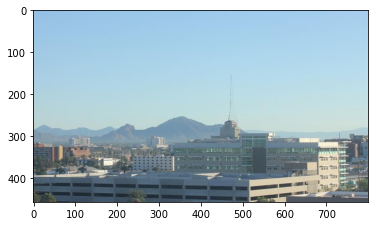

In [239]:
# Print out 1. The shape of the image and 2. The image's label

# Select an image and its label by list index
image_index = 1
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label: " + str(selected_label))





# 2. Pre-process the Data

After loading in each image, I standardized the input and output! 

### Standardize the Inputs: Resize to 600x1100 (hxw)

In [240]:
# This function take in an RGB image and return a new, standardized version
def standardize_input(image):
    
    # Resize image so that all "standard" images are the same size 600x1100
    w = 1100
    h = 600
    
    #dsize
    dsize = (w, h)
    
    # Resize
    standard_im = []
    standard_im = cv2.resize(image, dsize)
    
    return standard_im
#del len

len(standardize_input(IMAGE_LIST[1][0]))

600

In [241]:
def encode(label):
    
    numerical_val = 0
    if label == 'day':
        numerical_val = 1
    else:
        numerical_val = 0
        
    return numerical_val

## Construction of a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [242]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # Standardize the image
        standardized_im = standardize_input(image)
        
        # Create a numerical label
        binary_label = encode(label)
        
        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
    
    return standard_list
    
# Standardise all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.


Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


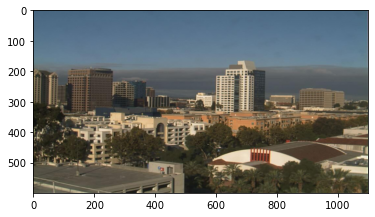

In [243]:
# Display a standardized image and its label

# Select an image by index
image_num = 6
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

## Feature Extraction

One of the key features betweeen **day** and **night** images is the brightness - day images have more brightness than night ones. These are steps I took to extract the average brightness of an image:

    1. Convert the image to HSV color space (the Value channel is an approximation for brightness)
    2. Sum up all the values of the pixels in the Value channel
    3. Divide that brightness sum by the area of the image, which is just the width times the height.

This gave us one value: the average brightness or the average Value of that image.



## RGB to HSV Conversion


Label: 1


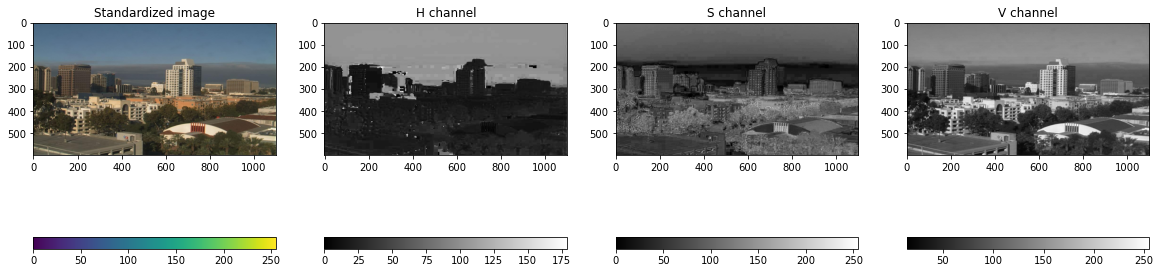

In [244]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 6
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels individually
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
im1 = ax1.imshow(test_im)
plt.colorbar(im1, ax=ax1, orientation="horizontal")

ax2.set_title('H channel')
im2 = ax2.imshow(h, cmap='gray')
plt.colorbar(im2, ax=ax2, orientation="horizontal")

ax3.set_title('S channel')
im3 = ax3.imshow(s, cmap='gray')
plt.colorbar(im3, ax=ax3, orientation="horizontal")

ax4.set_title('V channel')
im4 = ax4.imshow(v, cmap='gray')
plt.colorbar(im4, ax=ax4, orientation="horizontal")


The V channel is particularly high the sky at day time compared with the brightness at night time. Let s fine the average brightness...

## Find the average brightness using V channel
This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. 

In [245]:
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:, :, 2])
    
    # Calculate the average using the area of the image
    avg = None
    
    width = 1100.0
    height = 600
    A = width*height  #pixels
    
    avg = sum_brightness/A
    
    return avg

Avg brightness: 175.1298712121212
label:  1
Avg brightness: 192.95477272727274
label:  1
Avg brightness: 132.14143181818181
label:  1
Avg brightness: 199.78479696969697
label:  1
Avg brightness: 109.96470151515152
label:  1
Avg brightness: 200.05443484848485
label:  1
Avg brightness: 112.16535303030302
label:  1
Avg brightness: 103.3498606060606
label:  1
Avg brightness: 198.1317787878788
label:  1
Avg brightness: 104.26712878787879
label:  1
Avg brightness: 197.48356515151517
label:  1
Avg brightness: 105.53668484848485
label:  1
Avg brightness: 195.13657272727272
label:  1
Avg brightness: 108.44821515151516
label:  1
Avg brightness: 195.48862272727274
label:  1
Avg brightness: 107.67083636363637
label:  1
Avg brightness: 196.85269545454545
label:  1
Avg brightness: 191.30163939393938
label:  1
Avg brightness: 111.67128333333334
label:  1
Avg brightness: 181.7687196969697
label:  1
Avg brightness: 110.31529242424243
label:  1
Avg brightness: 187.73953333333333
label:  1
Avg brightness

Avg brightness: 102.3587696969697
label:  0
Avg brightness: 98.7316303030303
label:  0
Avg brightness: 99.29901212121212
label:  0
Avg brightness: 99.09342121212121
label:  0
Avg brightness: 99.35760757575757
label:  0
Avg brightness: 35.217
label:  0
Avg brightness: 99.2627393939394
label:  0
Avg brightness: 98.9982303030303
label:  0
Avg brightness: 101.58864848484849
label:  0
Avg brightness: 99.0969303030303
label:  0
Avg brightness: 99.06040606060606
label:  0
Avg brightness: 99.19055454545455
label:  0
Avg brightness: 99.53270606060606
label:  0
Avg brightness: 39.326240909090906
label:  0
Avg brightness: 99.63973636363636
label:  0
8.140281818181819 200.05443484848485


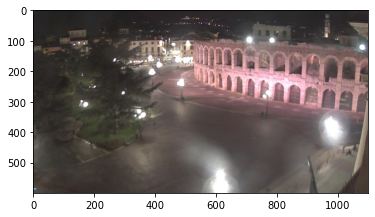

In [246]:
# Testing the avg brightness
len = 200

m_avg = []
for x in range(len):
    
    image_num = x
    test_im = STANDARDIZED_LIST[image_num][0]
    label = STANDARDIZED_LIST[image_num][1]

    avg = avg_brightness(test_im)
    print('Avg brightness: ' + str(avg))
    print('label: ', label)
    plt.imshow(test_im)
    m_avg.append(avg)
print(min(m_avg),max(m_avg)) 

## Classification

Turn average brightness features into a classifier that takes in a standardised image and returns a predicted_label for that image.

In [251]:
def estimate_label(rgb_image):
    
    # Extract average brightness features from an RGB image
    avg = avg_brightness(rgb_image)
    
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0 # night
    
    # Set value of a thresold to separate day and night images
    threshold = 100
    if avg > threshold:
        predicted_label = 1
        
    return predicted_label




## Test dataset
Test our classified and see if it can generalise the prediction

In [252]:
import random

# Load test dataset
TEST_IMAGE_LIST = load_dataset(image_dir_test)

# Standardise the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardised test data
random.shuffle(STANDARDIZED_TEST_LIST)
#len(STANDARDIZED_TEST_LIST)

In [253]:
# Construct a list of misclassified images given a list of test images and theirlabel
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []
    
    # Iterate through all test images
    # Classify each image and compare to the true label
    for image in test_images:
        
        # Get the true data
        im = image[0]
        true_label = image[1]
        
        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        
        # Compare true and predicted labels
        if predicted_label != true_label:
            # Then image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified (image, predicted_label, true_label) values
    return misclassified_images_labels


In [257]:
# Find al misclassfied images in a given test set
MISCALSSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
#del len
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCALSSIFIED)
accuracy = num_correct/total

print("Accuracy: " + str(accuracy))
print("Number of misclassified images = " + str(len(MISCALSSIFIED)) + " out of " + str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160





### Visualize the misclassified images

Visualization of some of the images I classified wrong (in the `MISCLASSIFIED` list)... 

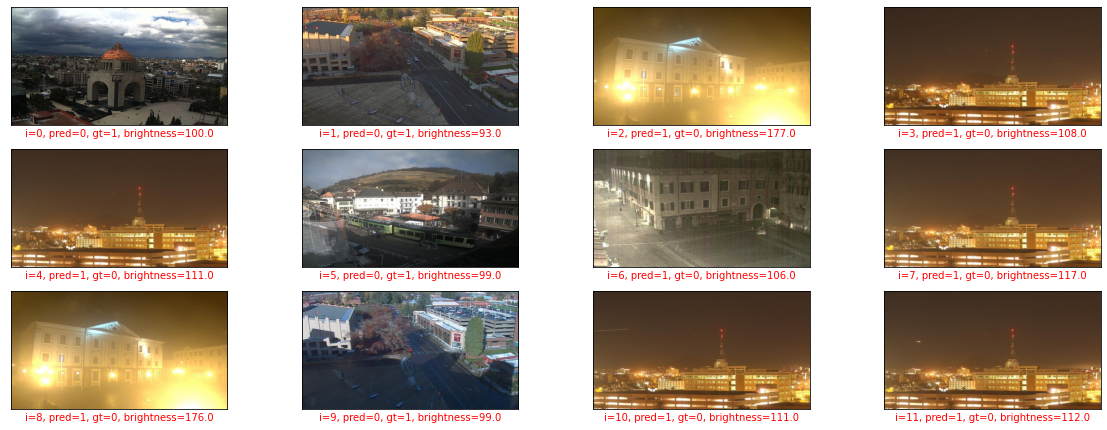

In [311]:
plt.figure(figsize= (20, 10))

start_index = 0

#plt.title('Misclassified image')
for i in range(len(MISCALSSIFIED)):
    plt.subplot(4, 4, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    bright = avg_brightness(MISCALSSIFIED[i][0])
    col = 'r'
    plt.xlabel('i={}, pred={}, gt={}, brightness={}'.format(start_index+i, MISCALSSIFIED[i][1], MISCALSSIFIED[i][2], round(bright)), color = col)
    plt.imshow(MISCALSSIFIED[i][0], cmap = 'binary' )
plt.show()

### What can I do to increase the accuracy?